# NB: The Tidyverse and Tibbles

Programming for Data Science

This notebook is based on [Wikham and Grolemund 2017](https://r4ds.had.co.nz/index.html).

## The Tidyverse

Tidyverse is a collection of essential R packages for data science.

The packages included in the Tidyverse are designed to support **the
pipeline of activities associated with data science**, such as filtering,
transforming, visualizing, etc.

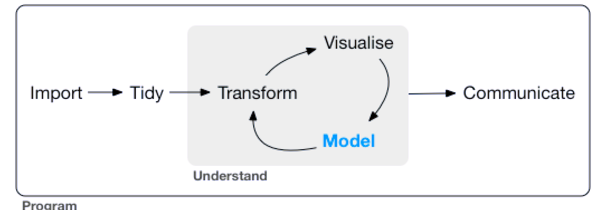

Tidyverse was created by **Hadley Wickham** and his team with the aim of
providing all these utilities to clean and work with data.

Here’s a graphic of the packages associated with the Tidyverse:

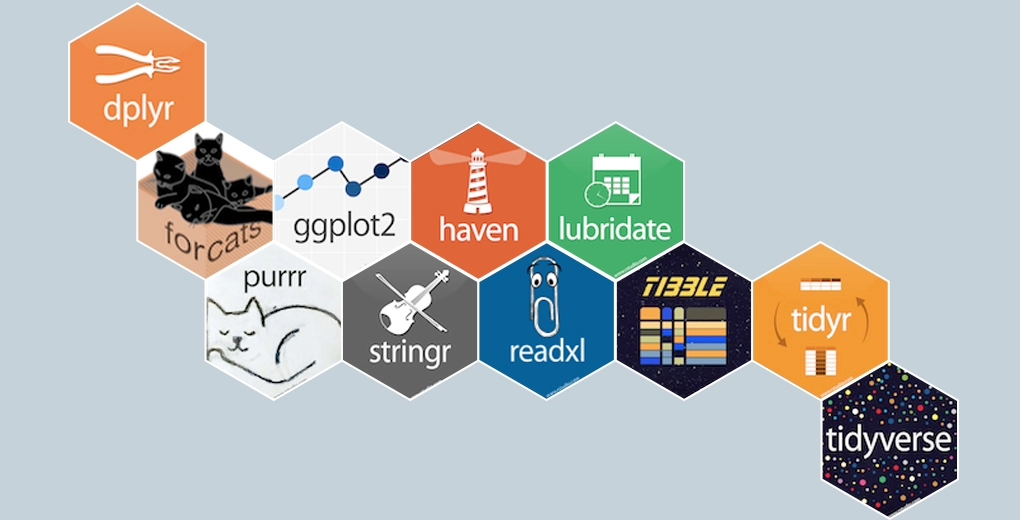

# Core Libraries

Of these libraries, three fundamental one are the following:

- `dplyr`: Provides a way to **process** data frames in an expressive way.
- `ggplot2`: Provides a way to **visualize** data in an expressive way.
- `tibble`: Provides a **foundational data structure** for use by other libraries in the Tidyverse.

We'll cover tibbles in this notebook and the other two in following notebooks.

## Tidy Data

Note that the word "[tidy](https://tidyr.tidyverse.org/articles/tidy-data.html)"  in Tidyverse stands for **a specific way to structure data in data frames**.

Tidy data frames have the following qualities:

Each **variable** forms a **column**.

Each **observation** forms a **row**.

Each **type** of observational unit forms a **table**.

## Using the Tidyverse

To use the Tidyverse, we often import everything:

In [1]:
install.packages("tidyverse")

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Piping with `%>%`

Just a quick note about this **odd looking** operator that you will
start to see.

One of the key elements of the Tidyverse is the use of **piping**.

Piping is the ability of to **pass the return values** of one function to another, without having to nest functions.

For example, instead of something like this:

In [3]:
a <- "Hello"
b <- "World"

var1 <- c(a, b)
var2 <- paste(var1)
print(var2)

[1] "Hello" "World"


Or this:

In [4]:
print(paste(c(a,b)))

[1] "Hello" "World"


We can do:

In [5]:
c(a, b) %>%
  paste() %>%
  print()

[1] "Hello" "World"


You can see that although this pattern is longer than the preceding, it is easier to read and write.

The pipe operator `%>%` is similar to the pipe operator `|` in Unix shells.

```bash
more foo.txt | grep bar
```

Piping is also similar to **method chaining** in Python, but is more pervasive.

In Python you can chain individual objects that return themselves (as it were). 

For example, we chain four operations below:

```python
df.value_counts('foo').to_frame('n').fillna(0).T
```

In  the Tidyverse, you pipe together **any two functions** so long as it makes sense that the **output** of one function is the **input** of another.

By default, the output of one function becomes **the first argument** of the function following the `%>%`. 

If not use the `.` placeholder variable to tell pipe operator where to put the data.

For example, here we want the data frame to be the second argument of the `lm()` function:
```r
my_data_frame %>%
lm(y ~ x, .)
```

By the way, the operator comes with the [**magrittr**](https://magrittr.tidyverse.org/) package, which is a
central part of the Tidyverse. It is so central, in fact, that packages in the tidyverse load `%>%` automatically.

# Tibbles

Dplyr can work with different rectangular data structures:

-   Plain old data frames
-   Tibbles
-   Data.tables (see
    [data.table](https://cran.r-project.org/web/packages/data.table/vignettes/datatable-intro.html))

The foundational data structure of the Tidyverse is the **tibble**.

Tibbles are data frames, but they tweak some older behaviors to make
your life a little easier.

## Creating tibbles

If you need to make a tibble “by hand”, you can use `tibble()` or `tribble()`.

`tibble()` works by assembling individual vectors, a **column-wise** operation:

In [6]:
x <- c(1, 2, 5)
y <- c("a", "b", "h")
tibble(x, y)

x,y
<dbl>,<chr>
1,a
2,b
5,h


You can also name the inputs, provide data inline with `c()`,
and perform computation:

In [7]:
tibble(
  x1 = x,
  x2 = c(10, 15, 25),
  y = sqrt(x1^2 + x2^2)
)

x1,x2,y
<dbl>,<dbl>,<dbl>
1,10,10.04988
2,15,15.13275
5,25,25.49510


Every column in a data frame or tibble must be the same length. If they
are not, you will get an error:

In [8]:
tibble(  
    x = c(1, 5),   
    y = c("a", "b", "c") 
)

ERROR: [1m[33mError[39m in `tibble()`:[22m
[1m[22m[33m![39m Tibble columns must have compatible sizes.
[36m•[39m Size 2: Existing data.
[36m•[39m Size 3: Column `y`.
[36mℹ[39m Only values of size one are recycled.


As the error message says, "Only values of size one are recycled." 

So this will work:

In [9]:
tibble(
  x = 1:5,
  y = "a",
  z = TRUE
)

x,y,z
<int>,<chr>,<lgl>
1,a,TRUE
2,a,TRUE
3,a,TRUE
4,a,TRUE
5,a,TRUE


## Tribbles

Another way to create a tibble is with `tribble()`, which short for
**transposed** tibble.

`tribble()` is customized for entering data directly in code, where **row-wise** entries are more natural. 

Column headings start with `~`.

Entries are separated by commas.

This makes it possible to lay out small amounts of data in an easy to
read form:

In [10]:
tribble(
  ~x, ~y, ~z,
  "a", 2, 3.6,
  "b", 1, 8.5
)

x,y,z
<chr>,<dbl>,<dbl>
a,2,3.6
b,1,8.5


Finally, if you have a regular data frame you can turn it into to a
tibble with `as_tibble()`:

In [11]:
as_tibble(mtcars) %>% head()

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


The inverse of `as_tibble()` is `as.data.frame()`.

It converts a tibble back into a regular `data.frame`.

## Non-syntactic names

It’s possible for a tibble to have column names that are not valid R
variable names, names that are **non-syntactic**.

For example, the variables might not start with a letter or they might contain unusual characters like a space.

In [12]:
tb <- tibble(
  `:)` = "smile", 
  ` ` = "space",
  `2000` = "number"
)

In [13]:
tb

:),,2000
<chr>,<chr>,<chr>
smile,space,number


Note that to refer to these variables, you need to surround them with backticks, `` ` ``:

You’ll also need the backticks when working with these variables in
other packages, like ggplot2, dplyr, and tidyr.

# Tibbles vs. Data Frames

There are two main areas in the usage of a tibble vs. a classic
data frame where the two differ in behavior: 

**printing** and **subsetting**.

If these differences cause problems when working with older packages,
you can turn a tibble back to a regular data frame with
`as.data.frame()`.

## Printing

The print method will print only **the first 10 rows** and the **columns that fit** on screen.

This makes it much easier to work with large data.

In [14]:
my_trib <- tibble(
  a = lubridate::now() + runif(1e3) * 86400,
  b = lubridate::today() + runif(1e3) * 30,
  c = 1:1e3,
  d = runif(1e3),
  e = sample(letters, 1e3, replace = TRUE)
)

In [15]:
print(my_trib)

# A tibble: 1,000 × 5
   a                   b              c      d e    
   <dttm>              <date>     <int>  <dbl> <chr>
 1 2024-09-27 11:55:17 2024-10-01     1 0.299  k    
 2 2024-09-28 09:32:40 2024-10-06     2 0.247  k    
 3 2024-09-27 13:15:14 2024-10-08     3 0.456  b    
 4 2024-09-28 04:51:21 2024-10-21     4 0.357  e    
 5 2024-09-28 10:08:21 2024-10-13     5 0.150  q    
 6 2024-09-28 01:33:43 2024-09-29     6 0.565  r    
 7 2024-09-27 21:58:04 2024-10-19     7 0.0905 y    
 8 2024-09-28 05:03:11 2024-10-02     8 0.912  f    
 9 2024-09-28 10:27:03 2024-10-13     9 0.169  z    
10 2024-09-28 03:24:24 2024-09-30    10 0.338  u    
# ℹ 990 more rows


Where possible, **tibbles also use color** to draw your eye to important
differences.

One of the most important distinctions is between the string `"NA"` and the missing value, `NA`:

In [16]:
print(tibble(x = c("NA", NA)))

# A tibble: 2 × 1
  x    
  <chr>
1 NA   
2 NA   


Tibbles are designed to avoid overwhelming your console when you print
large data frames.

But **sometimes you need more output** than the default display.

There are a few options that can help.

First, you can explicitly `print()` the data frame and control the
number of rows (`n`) and the `width` of the display. `width = Inf` will
display all columns:

In [17]:
# install.packages("nycflights13")

In [18]:
library(nycflights13)

In [19]:
flights %>% print(n = 10, width = Inf)

# A tibble: 336,776 × 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
   arr_delay carrier flight

You can also **control the default print behavior** by setting options:

-   `options(tibble.print_max = n, tibble.print_min = m)`: if more than
    `n` rows, print only `m` rows.
-   Use `options(tibble.print_min = Inf)` to always show all rows.
-   Use `options(tibble.width = Inf)` to always print all columns,
    regardless of the width of the screen.

You can see a complete list of options by looking at the package help
with `package?tibble`.

## Using RStudio `View()`

A final option is to use RStudio’s built-in data viewer to get a
scrollable view of the complete dataset. This is also often useful at
the end of a long chain of manipulations.

You can open a window with a view to your data by calling `View()`, like
so:

```r
flights %>% View()
```

Here’s what the opened window would looks like:

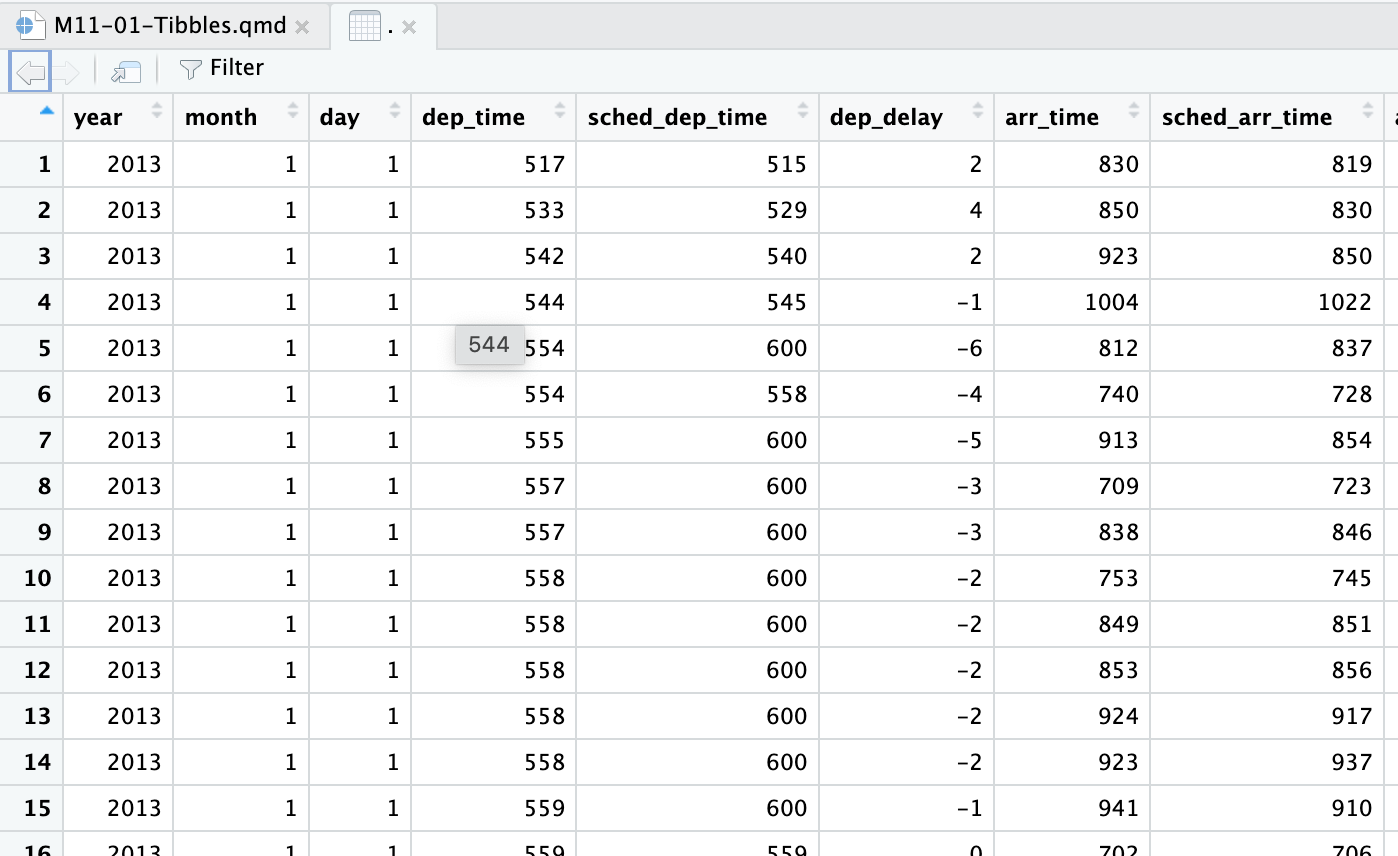

## Extracting variables

So far all the tools you’ve learned have worked with complete data
frames.

If you want to pull out a single variable, you can use `dplyr::pull()`:

In [20]:
tb <- tibble(
  id = LETTERS[1:5],
  x1  = 1:5,
  y1  = 6:10
)

In [21]:
tb %>% pull(x1) # by name

[1] 1 2 3 4 5

In [22]:
tb %>% pull(1)  # by position

[1] "A" "B" "C" "D" "E"

`pull()` also takes an optional `name` argument that specifies the
column to be used as names for a named vector.

In [23]:
tb %>% pull(x1, name = id) %>% print()

A B C D E 
1 2 3 4 5 


You can also use the base R tools `$` and `[[`. 

`[[` can extract by name or position.

`$` only extracts by name but is a little less typing.

Here we extract by name:

In [24]:
tb$x1

[1] 1 2 3 4 5

In [25]:
tb[["x1"]]

[1] 1 2 3 4 5

Here we extract by position:

In [26]:
tb[[1]]

[1] "A" "B" "C" "D" "E"

Compared to a data frame, tibbles are more **strict**.

They never do partial matching.

Partial matching is when you specify a part of a column name in a
selection operation and R returns the column that matches the substring
if there is one. 

For example, if you have a data frame `df` with a
column called `x1` and you do this — `df$x` — R will return that column,
assuming there are no other columns that begin with `x`. 

In [32]:
df <- as.data.frame(tb)

In [30]:
df$x

[1] 1 2 3 4 5

Nor will data frames generate a warning if the column you are trying to access does not exist.

In [31]:
df$z

NULL

Tibbles don’t do these things.

Instead, they treat both cases as unknown columns and warn the user.

In [27]:
tb$x

Warning message:
“Unknown or uninitialised column: `x`.”


NULL

In [28]:
tb$z

Warning message:
“Unknown or uninitialised column: `z`.”


NULL

For this reason we sometimes joke that **tibbles are lazy and surly**.

They do less and complain more :-)

## Subsetting

Lastly, there are some important differences when using `[`.

With traditional data frames, `[` sometimes returns a `data.frame`, and sometimes
returns a vector.

This is a common source of bugs.

With tibbles, `[` **always returns another tibble**.

This can sometimes cause problems when working with older code.

If you hit one of those functions, just use `as.data.frame()` to
    turn your tibble back to a `data.frame`.